In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip
/kaggle/input/quora-insincere-questions-classification/sample_submission.csv
/kaggle/input/quora-insincere-questions-classification/embeddings.zip
/kaggle/input/quora-insincere-questions-classification/train.csv
/kaggle/input/quora-insincere-questions-classification/test.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/quora-question-pairs/train.csv.zip")
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

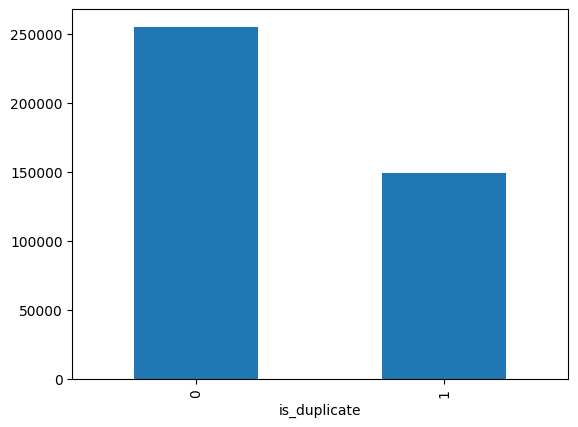

In [8]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of question getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of question getting repeated 111780


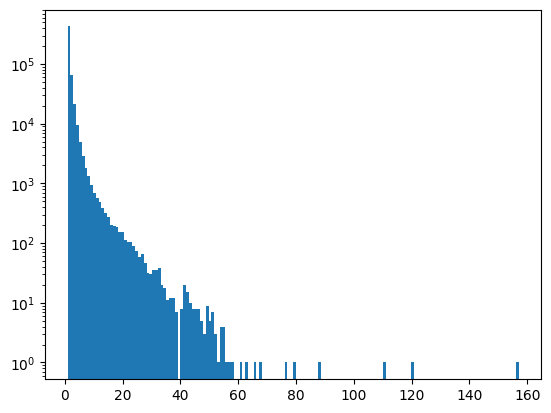

In [10]:
#Repeated Question Histogram

plt.hist(qid.value_counts().values,bins = 160)
plt.yscale('log')
plt.show()

In [11]:
new_df = df.sample(50000)

In [12]:
ques_df = new_df[['question1','question2']]
ques_df = ques_df.dropna(subset=['question1','question2'])
ques_df.head()

,question1,question2
148486,If [math]1\circ4=5[/math] and [math]2\circ5=12...,"Which is correct: ""Math"" or ""Maths""?"
247382,"Can a hermaphrodite impregnate itself? If so, ...",Can a hermaphrodite impregnate itself?
357489,Who created God n who created those who create...,If God has created everything then where did h...
4269,Should I go to IBS Hyderabad (ICFAI) for an MB...,"Which institute is better, ISB or IBS in Hyder..."
295602,What is the relationship like between Poland a...,What is the relationship like between Germany ...


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr,a2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [14]:
temp_df1 = pd.DataFrame(q1_arr,index= ques_df.index)
temp_df2 = pd.DataFrame(a2_arr,index= ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis = 1)
temp_df.shape

(50000, 6000)

In [15]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
148486,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
247382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [17]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
148486,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
247382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
357489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
temp_df.shape

(50000, 6001)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7501

In [21]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7306